In [59]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

datafile = pd.merge(mouse_data, clinical_trial, on= 'Mouse ID')
datafile.head()
# Display the data table for preview



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [117]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Grouped =datafile.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
Drug_data = pd.DataFrame(Grouped['Tumor Volume (mm3)'].mean()).reset_index()
# Preview DataFrame
Drug_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Sem_calc = Grouped.sem()

# Convert to DataFrame
Sem_data = Sem_calc.loc[:, ["Tumor Volume (mm3)"]].reset_index()
Sem_data.head()
# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
Cam = Drug_data.loc[Drug_data["Drug"]=='Capomulin', :]
cefta = Drug_data.loc[Drug_data["Drug"] =="Ceftamin", :].reset_index()
infu = Drug_data.loc[Drug_data["Drug"] =="Infubinol", :].reset_index()
Keta = Drug_data.loc[Drug_data["Drug"] =="Ketapril", :].reset_index()
Naft = Drug_data.loc[Drug_data["Drug"] =="Naftisol", :].reset_index()
placb = Drug_data.loc[Drug_data["Drug"] =="Placebo", :].reset_index()
propri = Drug_data.loc[Drug_data["Drug"] =="Propriva", :].reset_index()
Rami = Drug_data.loc[Drug_data["Drug"] =="Ramicane", :].reset_index()
Stela = Drug_data.loc[Drug_data["Drug"] =="Stelasyn", :].reset_index()
Zoni = Drug_data.loc[Drug_data["Drug"] =="Zoniferol", :].reset_index()

Drug_time_data = pd.DataFrame({
        "Timepoint": Cam['Timepoint'],
        "Capomulin": Cam['Tumor Volume (mm3)'],
        "Ceftamin": cefta['Tumor Volume (mm3)'],
        "Infubinol": infu['Tumor Volume (mm3)'],
        "Ketapril": Keta['Tumor Volume (mm3)'],
        "Naftisol": Naft['Tumor Volume (mm3)'],
        "Placebo": placb['Tumor Volume (mm3)'],
        "Propriva": propri['Tumor Volume (mm3)'],
        "Ramicane": Rami['Tumor Volume (mm3)'],
        "Stelasyn": Stela['Tumor Volume (mm3)'],
        "Zoniferol": Zoni['Tumor Volume (mm3)'],
})
Drug_time_data 




,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


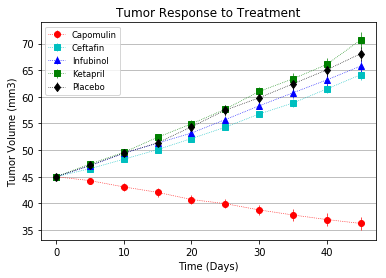

In [9]:
# Generate the Plot (with Error Bars)
x_axis = Drug_time_data['Timepoint']

#campomulin
Cam_sem_data = Sem_data.loc[Sem_data["Drug"]=='Capomulin', :]
Cam_sem = Cam_sem_data['Tumor Volume (mm3)']
Cam_means = Drug_time_data['Capomulin']
#Ceftamin
Ceft_sem_data = Sem_data.loc[Sem_data["Drug"]=='Ceftamin', :]
Ceft_sem = Ceft_sem_data['Tumor Volume (mm3)']
Ceft_means = Drug_time_data['Ceftamin']
#Infubinol
Infu_sem_data = Sem_data.loc[Sem_data["Drug"]=='Infubinol', :]
Infu_sem = Infu_sem_data['Tumor Volume (mm3)']
Infu_means = Drug_time_data['Infubinol']
#ketapril
Keta_sem_data = Sem_data.loc[Sem_data["Drug"]=='Ketapril', :]
Keta_sem = Keta_sem_data['Tumor Volume (mm3)']
Keta_means = Drug_time_data['Ketapril']
#Placebo 
place_sem_data = Sem_data.loc[Sem_data["Drug"]=='Placebo', :]
place_sem = place_sem_data['Tumor Volume (mm3)']
place_means = Drug_time_data['Placebo']



fig, ax = plt.subplots()
ax.errorbar(x_axis, Cam_means, Cam_sem, fmt = 'o:r', linewidth =0.7, label= 'Capomulin' )
ax.errorbar(x_axis, Ceft_means, Ceft_sem, fmt = 's:c', linewidth =0.7, label = 'Ceftafin' )
ax.errorbar(x_axis, Infu_means, Infu_sem, fmt = '^:b', linewidth =0.7, label = "Infubinol")
ax.errorbar(x_axis, Keta_means, Keta_sem, fmt = 's:g', linewidth =0.7, label = 'Ketapril' )
ax.errorbar(x_axis, place_means, place_sem, fmt = 'd:k', linewidth =0.7, label = 'Placebo')

ax.set_xlabel("Time (Days)")
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title("Tumor Response to Treatment")
ax.legend(fontsize = 'small')
ax.yaxis.grid()
# Save the Figure



## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_site_grouped = pd.DataFrame(Grouped['Metastatic Sites'].mean()).reset_index()
# Convert to DataFrame
Met_site_grouped.head()
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
Met_sites_SEM_data = Sem_calc.loc[:,['Metastatic Sites']].reset_index()

# Preview DataFrame
Met_sites_SEM_data.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
Cap_Met_sites = Met_site_grouped.loc[Met_site_grouped['Drug']=='Capomulin', :]
cefta_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Ceftamin", :].reset_index()
infu_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Infubinol", :].reset_index()
Keta_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Ketapril", :].reset_index()
Naft_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Naftisol", :].reset_index()
placb_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Placebo", :].reset_index()
propri_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Propriva", :].reset_index()
Rami_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Ramicane", :].reset_index()
Stela_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Stelasyn", :].reset_index()
Zoni_Met_sites = Met_site_grouped.loc[Met_site_grouped["Drug"] =="Zoniferol", :].reset_index()

Drug_Metsite_data = pd.DataFrame({
        "Timepoint": Cap_Met_sites['Timepoint'],
        "Capomulin": Cap_Met_sites['Metastatic Sites'],
        "Ceftamin": cefta_Met_sites['Metastatic Sites'],
        "Infubinol": infu_Met_sites['Metastatic Sites'],
        "Ketapril": Keta_Met_sites['Metastatic Sites'],
        "Naftisol": Naft_Met_sites['Metastatic Sites'],
        "Placebo": placb_Met_sites['Metastatic Sites'],
        "Propriva": propri_Met_sites['Metastatic Sites'],
        "Ramicane": Rami_Met_sites['Metastatic Sites'],
        "Stelasyn": Stela_Met_sites['Metastatic Sites'],
        "Zoniferol": Zoni_Met_sites['Metastatic Sites']})

# Preview that Reformatting worked
Drug_Metsite_data.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


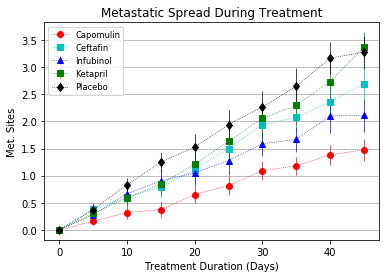

In [13]:
x_axis = Drug_Metsite_data['Timepoint']

#capomulin
Cap_metsite_sem_data= Met_sites_SEM_data.loc[Met_sites_SEM_data["Drug"]=='Capomulin', :]
Cap_metsite_sem = Cap_metsite_sem_data['Metastatic Sites']
Cap_metsites_means = Drug_Metsite_data['Capomulin']
#Ceftamin
Ceft_metsite_sem_data = Met_sites_SEM_data.loc[Met_sites_SEM_data["Drug"]=='Ceftamin', :]
Ceft_metsite_sem = Ceft_metsite_sem_data['Metastatic Sites']
Ceft_metsites_means = Drug_Metsite_data['Ceftamin']
#Infubinol
Infu_metsite_sem_data = Met_sites_SEM_data.loc[Met_sites_SEM_data["Drug"]=='Infubinol', :]
Infu_metsite_sem = Infu_metsite_sem_data['Metastatic Sites']
Infu_metsites_means = Drug_Metsite_data['Infubinol']
#ketapril
Keta_metsite_sem_data = Met_sites_SEM_data.loc[Met_sites_SEM_data["Drug"]=='Ketapril', :]
Keta_metsite_sem = Keta_metsite_sem_data['Metastatic Sites']
Keta_metsites_means = Drug_Metsite_data['Ketapril']
#Placebo 
place_metsite_sem_data = Met_sites_SEM_data.loc[Met_sites_SEM_data["Drug"]=='Placebo', :]
place_metsite_sem = place_metsite_sem_data['Metastatic Sites']
place_metsites_means = Drug_Metsite_data['Placebo']



fig, ax = plt.subplots()
ax.errorbar(x_axis, Cap_metsites_means, Cap_metsite_sem, fmt = 'o:r', linewidth =0.7, label= 'Capomulin' )
ax.errorbar(x_axis, Ceft_metsites_means, Ceft_metsite_sem, fmt = 's:c', linewidth =0.7, label = 'Ceftafin' )
ax.errorbar(x_axis, Infu_metsites_means, Infu_metsite_sem, fmt = '^:b', linewidth =0.7, label = "Infubinol")
ax.errorbar(x_axis, Keta_metsites_means, Keta_metsite_sem, fmt = 's:g', linewidth =0.7, label = 'Ketapril' )
ax.errorbar(x_axis, place_metsites_means, place_metsite_sem, fmt = 'd:k', linewidth =0.7, label = 'Placebo')

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel('Met. Sites')
ax.set_title('Metastatic Spread During Treatment')
ax.legend(fontsize = 'small')
ax.yaxis.grid()


# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Grouped =datafile.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
Mouse_ct = pd.DataFrame(Grouped['Mouse ID'].count()).reset_index()
# Preview DataFrame
Mouse_ct.rename(columns = {'Mouse ID': 'Mouse Count'}, inplace = True)
# Convert to DataFrame

# Preview DataFrame
Mouse_ct.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
Cap_mouse_ct = Mouse_ct.loc[Mouse_ct['Drug']=='Capomulin', :]
cefta_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Ceftamin", :].reset_index()
infu_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Infubinol", :].reset_index()
Keta_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Ketapril", :].reset_index()
Naft_mouse_ct= Mouse_ct.loc[Mouse_ct["Drug"] =="Naftisol", :].reset_index()
placb_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Placebo", :].reset_index()
propri_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Propriva", :].reset_index()
Rami_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Ramicane", :].reset_index()
Stela_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Stelasyn", :].reset_index()
Zoni_mouse_ct = Mouse_ct.loc[Mouse_ct["Drug"] =="Zoniferol", :].reset_index()

Drug_Mouse_ct_data = pd.DataFrame({
        "Timepoint": Cap_mouse_ct['Timepoint'],
        "Capomulin": Cap_mouse_ct['Mouse Count'],
        "Ceftamin": cefta_mouse_ct['Mouse Count'],
        "Infubinol": infu_mouse_ct['Mouse Count'],
        "Ketapril": Keta_mouse_ct['Mouse Count'],
        "Naftisol": Naft_mouse_ct['Mouse Count'],
        "Placebo": placb_mouse_ct['Mouse Count'],
        "Propriva": propri_mouse_ct['Mouse Count'],
        "Ramicane": Rami_mouse_ct['Mouse Count'],
        "Stelasyn": Stela_mouse_ct['Mouse Count'],
        "Zoniferol": Zoni_mouse_ct['Mouse Count']})
# Preview the Data Frame
Drug_Mouse_ct_data


,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


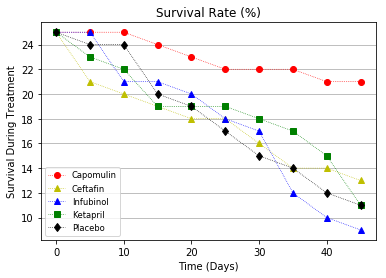

In [30]:
# Generate the Plot (Accounting for percentages)
x_axis = Drug_Mouse_ct_data['Timepoint']

Cap_mouseCT_chart = Drug_Mouse_ct_data['Capomulin']
Ceft_mouseCT_chart = Drug_Mouse_ct_data['Ceftamin']
Infu_mouseCT_chart = Drug_Mouse_ct_data['Infubinol']
Keta_mouseCT_chart = Drug_Mouse_ct_data['Ketapril']
Place_mouseCT_chart = Drug_Mouse_ct_data['Placebo']

fig, ax = plt.subplots()
ax.plot (x_axis, Cap_mouseCT_chart, 'ro:',  linewidth =0.7, label= 'Capomulin' )
ax.plot (x_axis, Ceft_mouseCT_chart, 'y^:', linewidth =0.7, label = 'Ceftafin' )
ax.plot (x_axis, Infu_mouseCT_chart, 'b^:', linewidth =0.7, label = 'Infubinol' )
ax.plot (x_axis, Keta_mouseCT_chart, 'gs:', linewidth =0.7, label = 'Ketapril' )
ax.plot (x_axis, Place_mouseCT_chart, 'kd:', linewidth =0.7, label = 'Placebo')

ax.set_xlabel("Time (Days)")
ax.set_ylabel('Survival During Treatment')
ax.set_title('Survival Rate (%)')
ax.legend(fontsize = 'small')
ax.yaxis.grid()


# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [8]:
#get a data to calculate the percent_change in tumor volume
Datafile = Drug_time_data.set_index('Timepoint')

# Calculate the percent changes for each drug
Percent_change_TumorVol = ((Datafile.iloc[-1]-Datafile.iloc[0])/Datafile.iloc[0])*100

# Display the data to confirm
Percent_change_TumorVol


Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

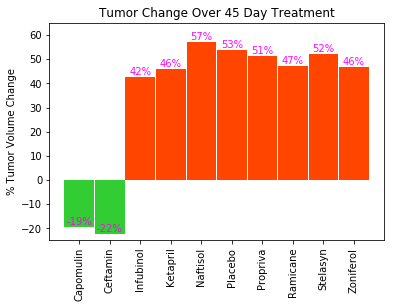

In [116]:
# Store all Relevant Percent Changes into a Tuple
Data = list(zip(Percent_change_TumorVol.index, Percent_change_TumorVol,))

Drugs, Percent_vol = [[z[i] for z in Data] for i in (0,1)]

passing = [value for value in Percent_vol if value < 0]
failing = [value for value in Percent_vol if value > 0]
x_axis1 = np.arange(len(passing))
x_axis2= np.arange(2, 10, 1)


fig, ax=plt.subplots()
ax.bar(x_axis1, passing, width = 0.97, color='limegreen')
ax.bar(x_axis2, failing, width = 0.97, color ='orangered')
ax.set_ylim(-25, 65)

tick_location=[value for value in x_axis]
plt.xticks(tick_location,[value for value in Drugs])
plt.xticks(rotation = 90)
plt.ylabel("% Tumor Volume Change")
plt.title('Tumor Change Over 45 Day Treatment')


# set individual bar lables using above list
for i in ax.patches:
    height= i.get_height()
    ax.text(i.get_x() + i.get_width()/2.,
             1.002*height,'%d' % int(height) +"%", ha='center', va='bottom', color='magenta', alpha=10)



# Save the Figure

# Show the Figure
